## Evaluation

Evaluation of a single data recording. This can be specified with ``file_path``

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from utils.preprocess_data import load_df

In [31]:
# reading csv file
file_path = "data/recs/2024-02-15-15-39-validation.csv"
df = load_df(file_path)

### Framerate

Framerate refers to the number of data rows (samples) per second. A frame can include the timestamps, position data, rotation around the z-axis of the robot or Vicon system, and the acceleration data from the Raspberry Pi.


In [32]:
time_norm = df["tStart"][len(df)-1] - df["tStart"][0]
framerate = len(df)/(time_norm/1000)
print("Framerate:",round(framerate,3),"Hz")

Framerate: 16.026 Hz


### Delay

This plot shows the difference between the timestamps ``TStart`` and ``TVicon``.
- ``TStart``: Timestamp just before the recording of a data series (after the Start or Done command).
- ``TVicon``: The Vicon system does not provide its own timestamp; it is created using the Python ``time.time()``function in the recording script.

Important: Both timestamps are created in the same way and on the same system. Only then can an accurate comparison be ensured.

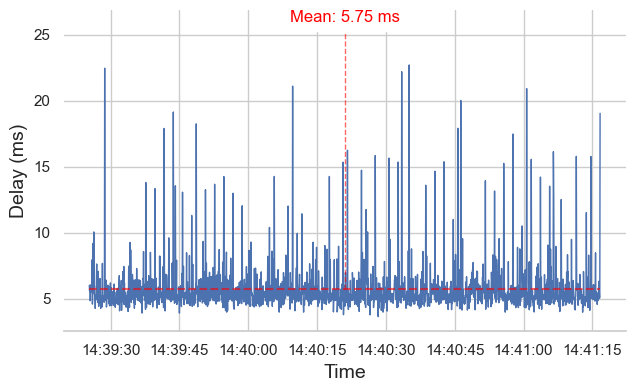

In [33]:
time_ax = df["tStart_datetime"]
delay = df["tV"]-df["tStart"]

sns.set(style='whitegrid')  # Set the style of the plot

# Set the figure size in points
figsize_in_points = (522, 300)  # Adjust these values as needed

# Convert points to inches (1 inch = 72 points)
figsize_in_inches = (figsize_in_points[0] / 72, figsize_in_points[1] / 72)

# Create a figure with the specified size
plt.figure(figsize=figsize_in_inches)
  # Set the figure size

plt.plot(time_ax,delay ,linewidth=1)
mean = np.mean(delay)
plt.hlines(mean, xmin=time_ax[0], xmax=time_ax[len(time_ax)-1], colors="red", linestyles="dashed", alpha=0.6)

# Annotate the mean value with a connection line
annotation_x = time_ax[len(time_ax) // 2]
annotation_y = mean 
plt.text(annotation_x, annotation_y+20, f'Mean: {mean:.2f} ms', color='red', ha='center', va='bottom', backgroundcolor='white')
plt.plot([annotation_x, annotation_x], [annotation_y, annotation_y + 20], color='red', linestyle='dashed', linewidth=1, alpha=0.6)


plt.xlabel("Time", fontsize =14) # , color='#4f4e4e'
plt.ylabel("Delay (ms)", fontsize =14)
# plt.title("Delay Start - Vicon", size =16, color='#4f4e4e')
# plt.yticks(list(plt.yticks()[0]) + [mean])
sns.despine(left=True)
plt.savefig('latex_figures/delay.pdf', format="pdf", bbox_inches="tight")
plt.show()


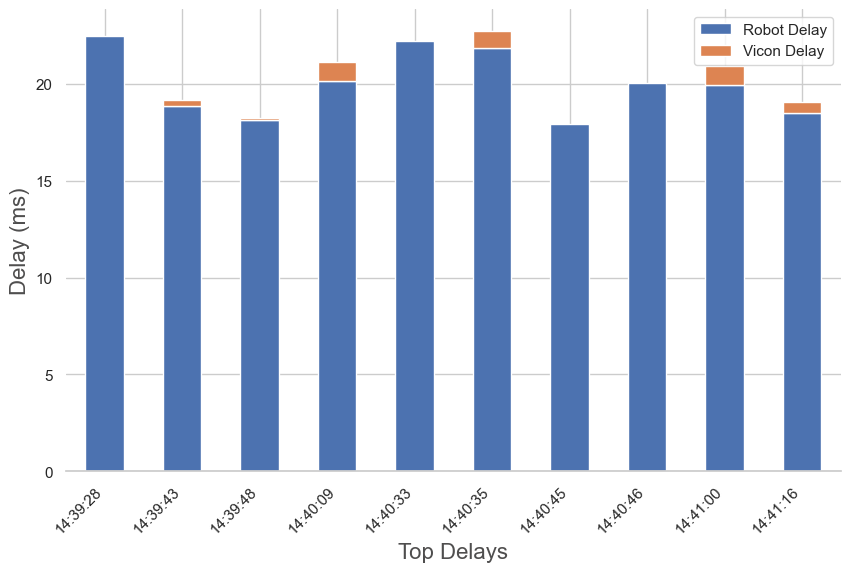

In [34]:
top_delays = delay.nlargest(n=10).sort_index()

top_delays_indexes = top_delays.index

top_tStart = df.loc[top_delays_indexes, "tStart"]
top_tR = df.loc[top_delays_indexes, "tR"]
top_tP = df.loc[top_delays_indexes, "tP"]
top_tV = df.loc[top_delays_indexes, "tV"]

if top_tP.isna().all():
    # Create a DataFrame with the delays
    delays_df = pd.DataFrame({
        'Robot Delay': top_tR - top_tStart,
        'Vicon Delay': top_tV - top_tR 
    })
else: 
        # Create a DataFrame with the delays
    delays_df = pd.DataFrame({
        'Robot Delay': top_tR - top_tStart,
        'PI Delay': top_tP - top_tR ,
        'Vicon Delay': top_tV - top_tP 
    })

# Plotting the stacked bar chart
ax = delays_df.plot(kind='bar', stacked=True, figsize=(10, 6))
xticklabels = df.loc[top_delays_indexes,"tStart_datetime"].dt.strftime('%H:%M:%S')
ax.set_xticklabels(xticklabels, rotation = 45, ha = "right")
# Adding labels and title
plt.xlabel('Top Delays',size =16, color='#4f4e4e')
plt.ylabel('Delay (ms)',size =16, color='#4f4e4e')
sns.despine(ax=ax, left=True)
plt.show()

### X vs Y Positions Plots

Die Y-Position über die X-Position aufgetragen

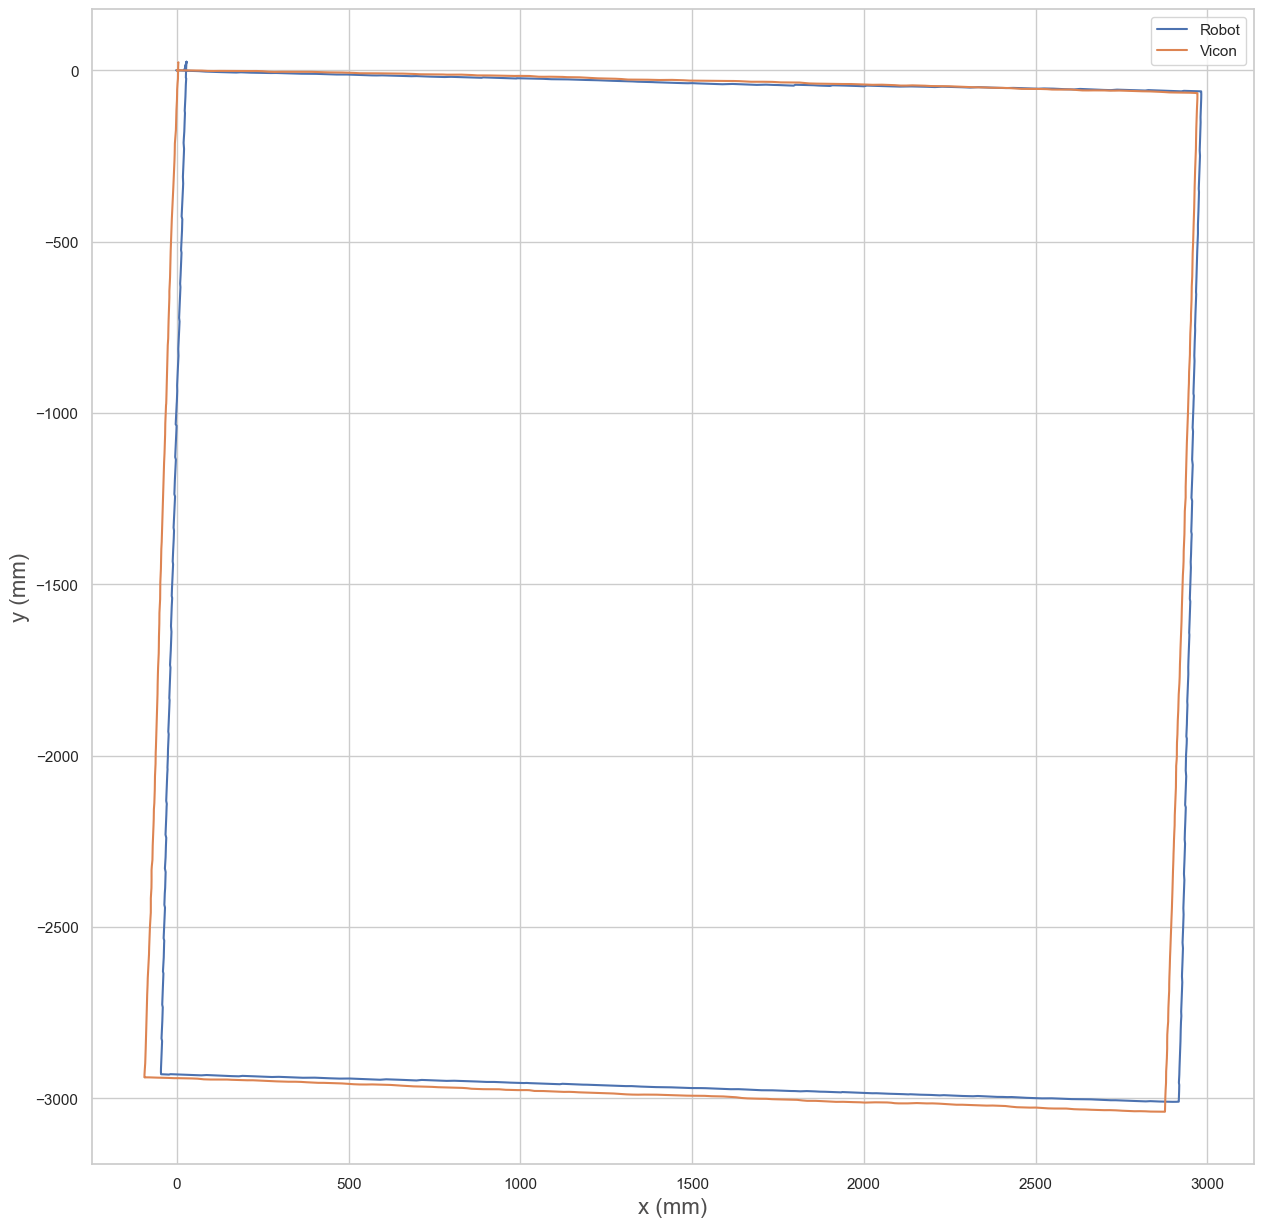

In [35]:
sns.set(style='whitegrid')  # Set the style of the plot

plt.figure(figsize=(15, 15))  # Set the figure size

plt.plot(df["xR"], df["yR"], label = "Robot") 
plt.plot(df["xV"], df["yV"], label = "Vicon")

plt.xlabel("x (mm)", size =16, color='#4f4e4e')
plt.ylabel("y (mm)", size =16, color='#4f4e4e')
plt.legend()
plt.show()

### Vergleich der X und Y Koordinaten

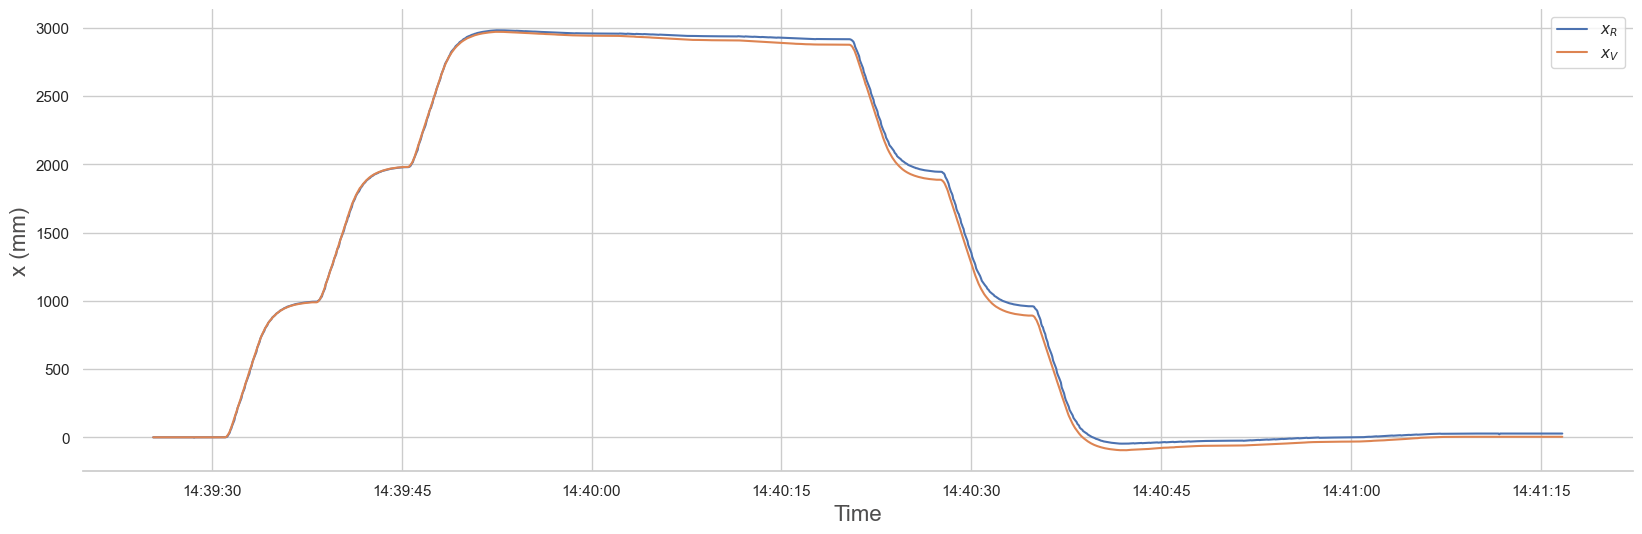

In [36]:
# Assuming you have a DataFrame named 'df'
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 6))  # Set the figure size

# Plot using Seaborn's lineplot function
plt.plot(df["tStart_datetime"],df["xR"], label=r"$x_R$")
plt.plot(df["tStart_datetime"],df["xV"], label=r"$x_V$")

# Set labels and title
plt.xlabel("Time", size =16, color='#4f4e4e')
plt.ylabel("x (mm)", size =16, color='#4f4e4e')

# Add a legend
plt.legend()
sns.despine(left=True)
# Display the plot
plt.show()

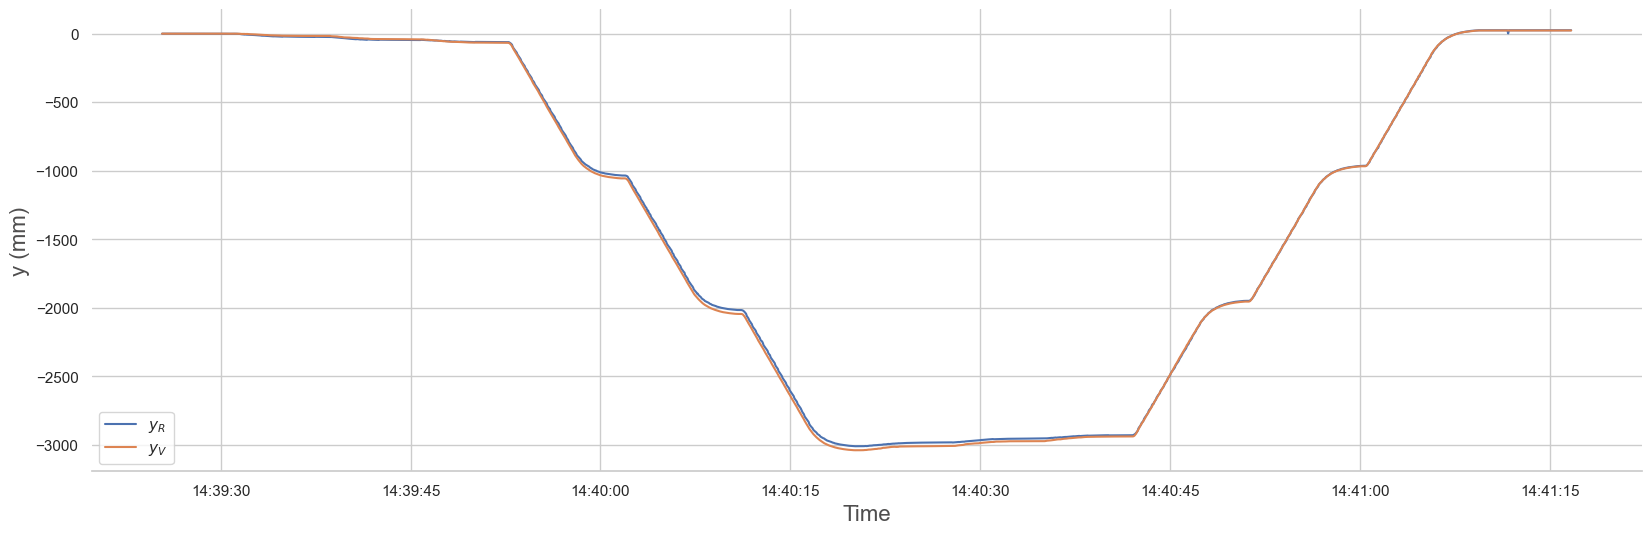

In [37]:
# Assuming you have a DataFrame named 'df'
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 6))  # Set the figure size

# Plot using Seaborn's lineplot function
plt.plot(df["tStart_datetime"],df["yR"], label=r"$y_R$")
plt.plot(df["tStart_datetime"],df["yV"], label=r"$y_V$")

# Set labels and title
plt.xlabel("Time", size =16, color='#4f4e4e')
plt.ylabel("y (mm)", size =16, color='#4f4e4e')

# Add a legend
plt.legend()
sns.despine(left=True)
# Display the plot
plt.show()

### Differenz der X und Y Koordinaten

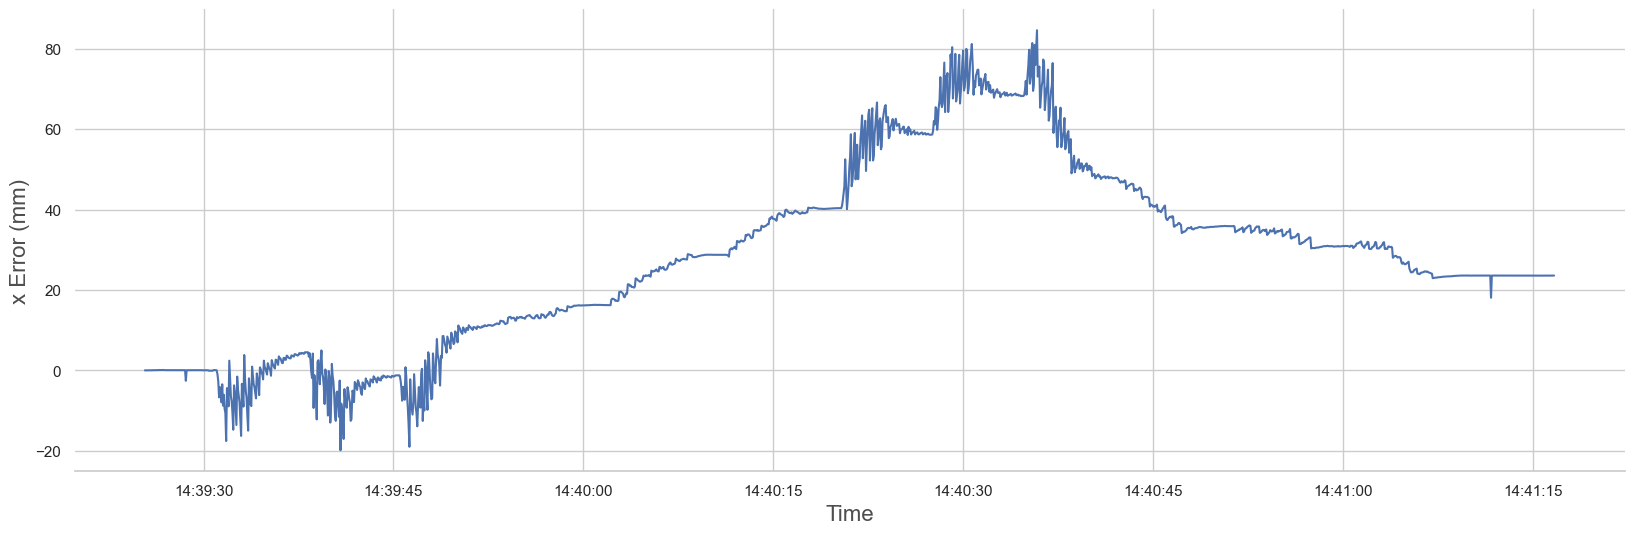

In [38]:
# Assuming you have a DataFrame named 'df' with a time column named 'time'
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 6))  # Set the figure size

# Plot using Seaborn's lineplot function with time on the x-axis
x_diff = df["xR"] - df["xV"]
plt.plot(df["tStart_datetime"], x_diff, )
# Set labels and title
plt.xlabel("Time", size =16, color='#4f4e4e')
plt.ylabel("x Error (mm)", size =16, color='#4f4e4e')
sns.despine(left=True)
#plt.title("Difference between xR and xV over Time")

# Display the plot
plt.show()

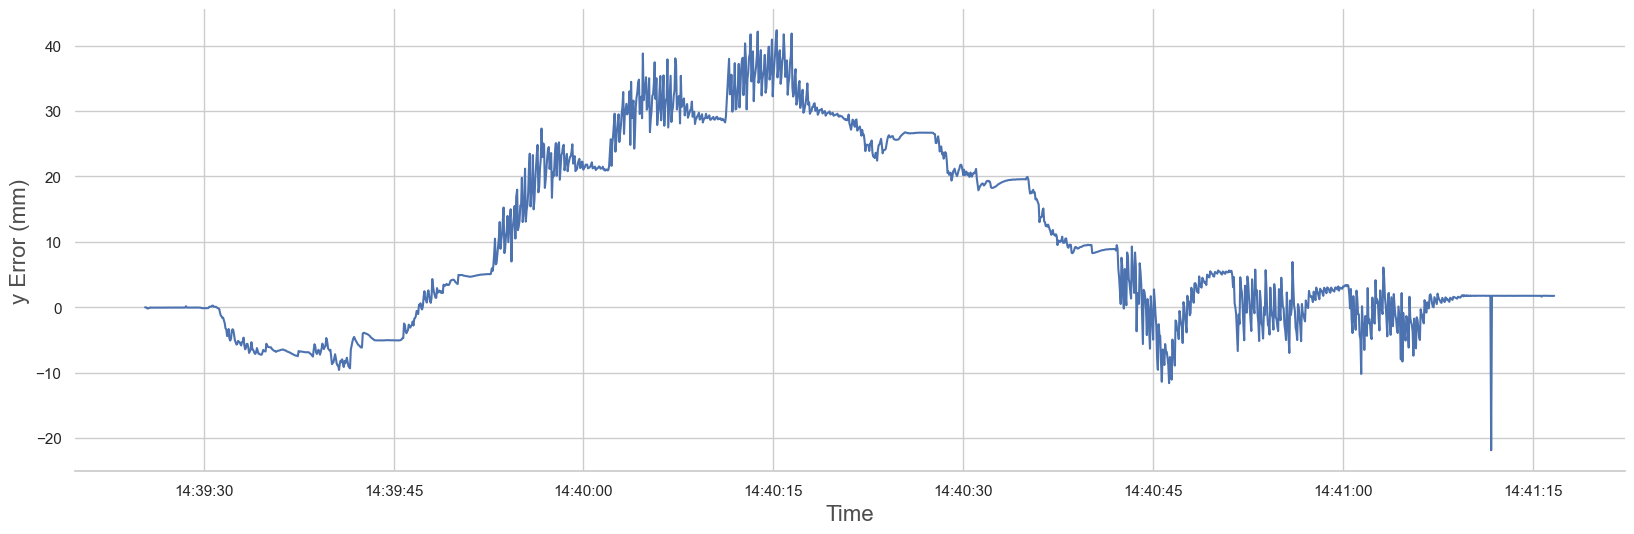

In [39]:
# Assuming you have a DataFrame named 'df' with a time column named 'time'
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 6))  # Set the figure size

# Plot using Seaborn's lineplot function with time on the x-axis
y_diff = df["yR"] - df["yV"]
plt.plot(df["tStart_datetime"], y_diff)
# Set labels and title
plt.xlabel("Time", size =16, color='#4f4e4e')
plt.ylabel("y Error (mm)", size =16, color='#4f4e4e')
sns.despine(left=True)
#plt.title("Difference between xR and xV over Time")
# Display the plot
plt.show()

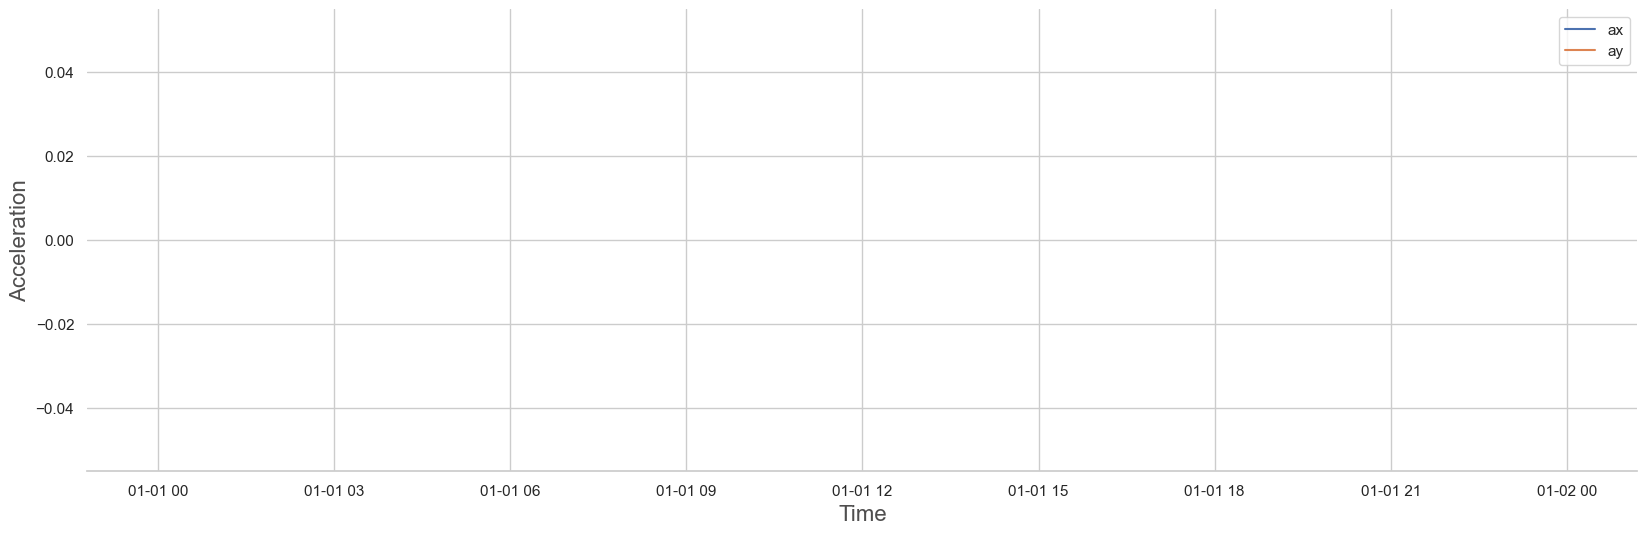

In [40]:

sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(20, 6))  # Set the figure size

# Plot using Seaborn's lineplot function with time on the x-axis
plt.plot(df["tStart_datetime"], df["axP"], label="ax")
plt.plot(df["tStart_datetime"], df["ayP"], label="ay")
#plt.plot(df["tStart_datetime"], df["azP"], label="az")
# Set labels and title
plt.xlabel("Time", size =16, color='#4f4e4e')
plt.ylabel("Acceleration", size =16, color='#4f4e4e')
sns.despine(left=True)
#plt.title("Difference between xR and xV over Time")
plt.legend()
# Display the plot
plt.show()

## Validation

In [41]:
xR_fine = df["xR_fine"].drop_duplicates()
yR_fine = df["yR_fine"].drop_duplicates()

print("fineloc deviation X: ", xR_fine.iloc[1] + xR_fine.iloc[-1])
print("fineloc deviation Y: ", yR_fine.iloc[1] + yR_fine.iloc[-1])

fineloc deviation X:  -8.145091184179
fineloc deviation Y:  -23.4185351914628


In [52]:
print(f'vicon deviation X: {df.loc[len(df)-1,"xV"]}')
print(f'vicon deviation y: {df.loc[len(df)-1,"yV"]}')

vicon deviation X: 3.9480022712576375
vicon deviation y: 23.25309942428656
